In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
def remove_negative_points(X, y):
    """
    :param X: X coordinates of points
    :param y: y coordinates of points
    :return X, y: original coordinates with points not in the first quadrant removed
    """

    negative_y_mask = np.where(y < 0, True, False)
    y = y[~negative_y_mask]
    X = X[~negative_y_mask]
    negative_X_mask = np.where(X < 0, True, False)
    y = y[~negative_X_mask]
    X = X[~negative_X_mask]
    
    return X, y


def truncate_negative_points(X, y):
    """
    :param X: X coordinates of points
    :param y: y coordinates of points
    :return X, y: original coordinates with points not in the first quadrant projected onto
                  the x and y axes
    """

    y = np.where(y < 0, 0, y)
    X = np.where(X < 0, 0, X)
    
    return X, y


def lin_reg(X, y):
    """
    :param X: X coordinates of points
    :param y: y coordinates of points
    :return X, y: linear regression model fitted with X and y
    """

    model = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))
    
    return model


def get_equivalence_ratio(slopes, intercept):
    """
    :param slopes: coefficients of the application/project variables outputted by the linear regression
    :param intercept: intercept of the model outputted by linear regression
    :return ER: the equivalence ratio calculated from the inputted slopes and intercept
    """

    # first element corresponds to the ER of the variable that is being predicted
    first_element = intercept
    # if slopes is an array of more than one coefficient
    if isinstance(slopes, np.ndarray):
        next_elements = - np.repeat(intercept, len(slopes)) / slopes
    # else slopes is just one number
    else:
        next_elements = - intercept / slopes
    ER = []
    ER.append(first_element)
    
    # if slopes is an array of more than one coefficient
    if isinstance(slopes, np.ndarray):
        [ER.append(next_elements[i]) for i in range(len(next_elements))]
    else:
        ER.append(next_elements)
    return ER


def get_all_individual_equivalence_ratios(slopes, intercepts):
    """
    The following function is for all of the machines
    :param slopes: coefficients of the application/project variables outputted by the linear regression for 
                   every machine
    :param intercept: intercept of the model outputted by linear regression for every machine
    :return ER: the equivalence ratios calculated from the inputted slopes and intercept for all machines
    """

    equivalence_ratios = np.zeros(shape=[num_machines, num_projects])
    for num_line, (slopes, intercept) in enumerate(zip(slopes, intercepts)):
        current_er = get_equivalence_ratio(slopes, intercept)
        equivalence_ratios[num_line] = current_er
    return equivalence_ratios


def get_x_axis_coordinate_from_slope_and_intercept(slope, intercept):
    """
    :param slope: coefficient of the application/project variables outputted by the linear regression 
    :param intercept: intercept of the model outputted by linear regression for every machine
    :return x-axis coordinate defined by the slope and intercept
    """

    return - intercept / slope


def get_y_axis_coordinate_from_slope_and_intercept(slope, intercept):
    """
    :param slope: coefficient of the application/project variables outputted by the linear regression 
    :param intercept: intercept of the model outputted by linear regression for every machine
    :return y-axis coordinate defined by the slope and intercept
    """

    return intercept


def get_axes_points_for_plotting(slopes, intercept):
    """
    :param slopes: coefficients of the application/project variables outputted by the linear regression 
    :param intercept: intercept of the model outputted by linear regression 
    :return x- and y-coordinates to plot the lines defining the equivalence ratios
    """

    cur_x_axis_coordinate = get_x_axis_coordinate_from_slope_and_intercept(slopes, intercept)
    cur_y_axis_coordinate = get_y_axis_coordinate_from_slope_and_intercept(slopes, intercept)
    
    xs_to_plot = [cur_x_axis_coordinate, 0]
    ys_to_plot = [0, cur_y_axis_coordinate]

    return xs_to_plot, ys_to_plot


def get_intercepts_from_slopes_and_points(slopes, X, y):
    """
    :param slopes: coefficients of the application/project variables outputted by the linear regression 
    :param X: X coordinates of points
    :param y: y coordinates of points
    :return slopes and intercepts defining the lines going through the points with the corresponding slopes
    """
    
    # assuming two dimensions, given the slope and data points, will return the intercepts
    slopes = [slopes[0][0] for _ in  range(len(X))]
    intercepts = y - slopes * X
    
    return slopes, intercepts


def get_new_slopes_and_intercepts(slopes, X, y):
    """
    :param slopes: coefficients of the application/project variables outputted by the linear regression 
    :param X: X coordinates of points
    :param y: y coordinates of points
    :return new slopes and intercepts, which are shifted versions derived from the inputted slopes and points
    """

    multiplicative_factors = np.random.uniform(low=0.50, high=1.50, size=len(X)) 
    new_slopes = (multiplicative_factors * slopes)[0]
    new_intercepts = y - new_slopes * X
    
    return new_slopes, new_intercepts


def plot_individual_ER_same_color(slopes, intercepts):
    """
    :param slopes: coefficients of the application/project variables outputted by the linear regression 
    :param intercepts: intercepts of the model outputted by linear regression 
    plots individual lines defining ERs all the same color (returns nothing)
    """

    for num_line in range(len(slopes)):
        cur_slope = slopes[num_line]
        cur_intercept = intercepts[num_line]

        xs_to_plot, ys_to_plot = get_axes_points_for_plotting(cur_slope, cur_intercept)

        plt.plot(xs_to_plot, ys_to_plot, color='blue')
    
    fig = plt.gcf()
    fig.set_size_inches(20, 7)

    
def plot_individual_ER(slopes, intercepts):
    """
    :param slopes: coefficients of the application/project variables outputted by the linear regression 
    :param intercepts: intercepts of the model outputted by linear regression 
    plots individual lines defining ERs different colors (returns nothing)
    """

    for num_line in range(len(slopes)):
        cur_slope = slopes[num_line]
        cur_intercept = intercepts[num_line]

        xs_to_plot, ys_to_plot = get_axes_points_for_plotting(cur_slope, cur_intercept)

        plt.plot(xs_to_plot, ys_to_plot)
    
    fig = plt.gcf()
    fig.set_size_inches(20, 7)

    
def plot_individual_ER_colored(slopes, intercepts, did_applications_change):
    """
    :param slopes: coefficients of the application/project variables outputted by the linear regression 
    :param intercepts: intercepts of the model outputted by linear regression 
    :param did_applications_change: boolean array indicating whether the most profitable application for
                                    a given machine changed based on the last ER update
    plots lines defining ERs that didn't have their most profitable application change green, otherwise 
    red (returns nothing)
    """

    for num_line in range(len(slopes)):
        cur_slope = slopes[num_line]
        cur_intercept = intercepts[num_line]

        xs_to_plot, ys_to_plot = get_axes_points_for_plotting(cur_slope, cur_intercept)
        
        if did_application_change is None:
            plt.plot(xs_to_plot, ys_to_plot, color='grey')
        elif did_applications_change[num_line]:
            plt.plot(xs_to_plot, ys_to_plot, color='r')
        else:
            plt.plot(xs_to_plot, ys_to_plot, color='g')
    
    fig = plt.gcf()
    fig.set_size_inches(20, 7)

    
def plot_individual_ER_colored_animation(slopes, intercepts, did_applications_change, ax):
    for num_line in range(len(slopes)):
        cur_slope = slopes[num_line]
        cur_intercept = intercepts[num_line]

        xs_to_plot, ys_to_plot = get_axes_points_for_plotting(cur_slope, cur_intercept)
        
        if did_application_change is None:
            ax.plot(xs_to_plot, ys_to_plot, color='grey')
        elif did_applications_change[num_line]:
            ax.plot(xs_to_plot, ys_to_plot, color='r')
        else:
            ax.plot(xs_to_plot, ys_to_plot, color='g')
    
#     fig = plt.gcf()
#     fig.set_size_inches(20, 7)

    
def plot_network_ER(slopes, intercepts):
    """
    :param slopes: coefficients of the application/project variables outputted by the linear regression 
    :param intercept: intercept of the model outputted by linear regression 
    plots the network-wide ER (returns nothing)
    """

    ER_xs_to_plot, ER_ys_to_plot = get_axes_points_for_plotting(slopes, intercepts)
    plt.plot(ER_xs_to_plot, ER_ys_to_plot, color='black', linewidth=7)
    fig = plt.gcf()
    fig.set_size_inches(20, 7)
    
    
def plot_network_ER_from_ER(network_ER):
    """
    :param network_ER: network-wide ER 
    plots the network-wide ER (returns nothing)
    """

    ER_xs_to_plot = [network_ER[1], 0]
    ER_ys_to_plot = [0, network_ER[0]]
    plt.plot(ER_xs_to_plot, ER_ys_to_plot, color='black', linewidth=7)
    fig = plt.gcf()
    fig.set_size_inches(20, 7)
    
    
def plot_network_ER_from_ER_animation(network_ER, ax):
    ER_xs_to_plot = [network_ER[1], 0]
    ER_ys_to_plot = [0, network_ER[0]]
    ax.plot(ER_xs_to_plot, ER_ys_to_plot, color='black', linewidth=7)
    fig = plt.gcf()
    fig.set_size_inches(20, 7)

    
def get_indices_most_profitable_projects(individual_ERs, network_ER):
    """
    :param individual_ERs: ERs of every machine
    :param network_ER: network-wide ER
    :return indices_most_profitable_applications: indices of the most profitable projects for each machine
    """

    profitability_matrix = individual_ERs / np.array(network_ER).reshape(len(network_ER))
    indices_most_profitable_applications = profitability_matrix.argmax(axis=1)

#     print(individual_ERs, individual_ERs.shape)
#     print(np.array(network_ER), np.array(network_ER).shape)
#     print('profitability matrix', profitability_matrix)
    
    return indices_most_profitable_applications


def update_points(slopes, intercepts, individual_ERs, network_ER):
    """
    This function will update the applications/positions of the machines based on their most profitable 
    options as determined by the best-fit line

    :param slopes: coefficients of the application/project variables outputted by the linear regression 
    :param intercept: intercept of the model outputted by linear regression 
    :param individual_ERs: ERs of every machine
    :param network_ER: network-wide ER
    :return indices_most_profitable_applications: indices of the most profitable projects for each machine
    """

    indices_most_profitable_applications = get_indices_most_profitable_projects(individual_ERs, network_ER)
#     print('most profitable applications ', indices_most_profitable_applications)
    new_X_positions = np.zeros(len(X))
    new_y_positions = np.zeros(len(y))
    for num_point, most_profitable_project in enumerate(indices_most_profitable_applications):
        cur_slope, cur_intercept = slopes[num_point], intercepts[num_point]

        cur_best_application = indices_most_profitable_applications[num_point]
        if cur_best_application == 1:
            new_X_positions[num_point] = get_x_axis_coordinate_from_slope_and_intercept(cur_slope, cur_intercept)
            new_y_positions[num_point] = 0
        if cur_best_application == 0:
            new_X_positions[num_point] = 0
            new_y_positions[num_point] = get_y_axis_coordinate_from_slope_and_intercept(cur_slope, cur_intercept)

    return new_X_positions, new_y_positions


First, let's get an idealized visualization of the Equivalence Ratio $(\rho_1^i, \rho_2^i) = (100, 50)$ for a single machine $m_i$, along with different resources shares for the applications labeled above the points. 

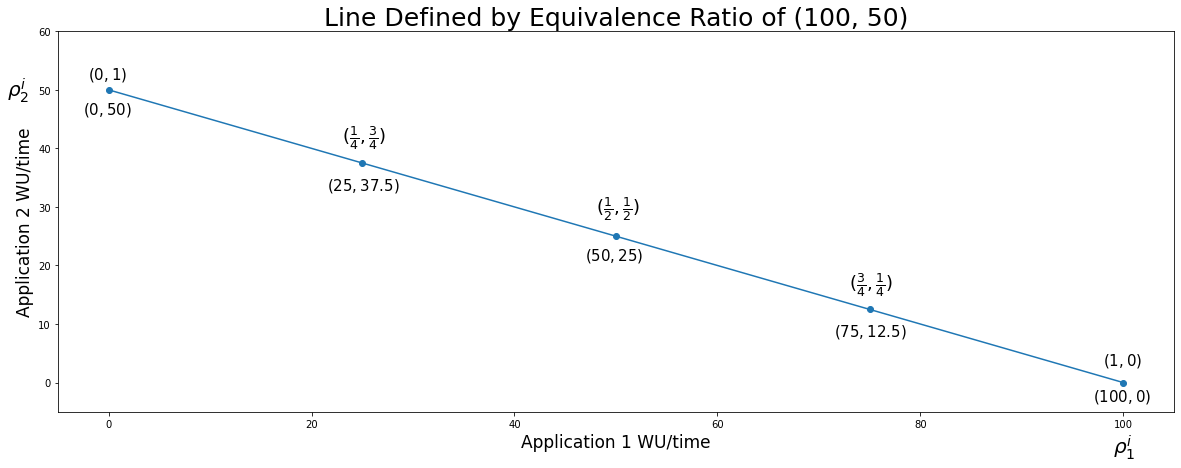

In [3]:
plt.plot([100, 0], [0, 50])
x_frac = [100, 75, 50, 25, 0]
y_frac = [0, 12.5, 25, 37.5, 50]
plt.scatter(x_frac, y_frac)
fig = plt.gcf()
plt.ylim(-5, 60)
fig.set_size_inches(20, 7)
plt.text(99, -12, r'$\rho_1^i$', size=20)
plt.text(-10, 49, r'$\rho_2^i$', size=20)

plt.text(-2.5, 46, r'$(0, 50)$', size=15)
plt.text(21.5, 33, r'$(25, 37.5)$', size=15)
plt.text(47, 21, r'$(50, 25)$', size=15)
plt.text(71.5, 8, r'$(75, 12.5)$', size=15)
plt.text(97, -3, r'$(100, 0)$', size=15)

plt.text(-2, 52, r'$(0, 1)$', size=15)
plt.text(23, 41, r'$(\frac{1}{4}, \frac{3}{4})$', size=18)
plt.text(48, 29, r'$(\frac{1}{2}, \frac{1}{2})$', size=18)
plt.text(73, 16, r'$(\frac{3}{4}, \frac{1}{4})$', size=18)
plt.text(98, 3, r'$(1, 0)$', size=15)

plt.xlabel('Application 1 WU/time', size=17)
plt.ylabel('Application 2 WU/time', size=17)
plt.title('Line Defined by Equivalence Ratio of (100, 50)', size=25)

plt.savefig('./images/Example Equivalence Ratio.png', bbox_inches='tight')

plt.show()

Next, we will make synthetic datapoints modeling actual machine outputs in this example, 2-application universe. For ease of visualization, there will only be twenty machines, 5 crunching only the first application, 5 crunching only the second, and 10 crunching both. They will be drawn from Gaussian distributions with means centered at the equivalence ratio used above, (100, 50); however, this will not affect modeling, this points could have been chosen in a wide variety of manners.

In [4]:
sample_X = np.random.normal(loc=100, scale=20, size=15)
sample_y = np.random.normal(loc=50, scale=20, size=15)
sample_X, sample_y
points_from_application_1 = list(zip(sample_X[:5], np.zeros(5)))
points_from_application_2 = list(zip(np.zeros(5), sample_y[:5]))
ws = np.random.uniform(low=0, high=1, size=10)
points_from_both_applications =  list(zip(sample_X[5 : 15] * ws, sample_y[5 : 15] * (1 - ws)))
points = np.concatenate((points_from_application_1, points_from_application_2, points_from_both_applications))
X, y = points[:, 0], points[:, 1]
X, y

(array([117.30751822,  88.05833918,  92.28597876,  69.50723001,
        108.34285134,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  80.1549488 ,   5.27433452,
         49.7240914 ,  24.99896271,  34.56752789,  11.57410765,
         81.66114314,  59.5263631 ,  32.43855743,  31.08554145]),
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        58.12499424, 55.80681956, 18.77537275, 42.02922254, 57.97242524,
        11.38120929, 40.56520494,  6.67966131, 26.27664852, 30.27329772,
        31.82476679, 14.2504585 , 16.30236653, 44.56069636, 31.21227407]))

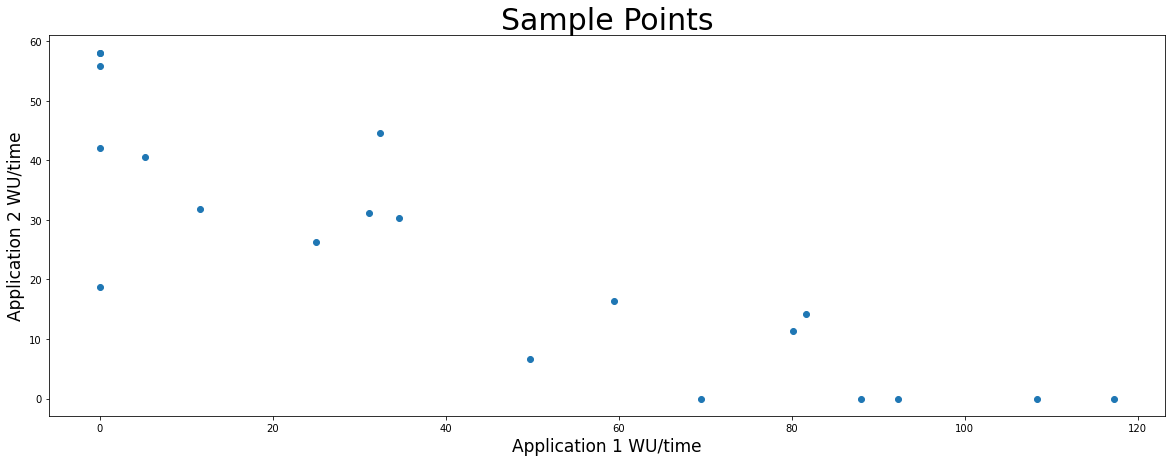

In [5]:
num_machines = len(X)
num_projects = 2



plt.scatter(X, y);
plt.xlabel('Application 1 WU/time', size=17)
plt.ylabel('Application 2 WU/time', size=17)
plt.title('Sample Points', size=30)
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.savefig('./images/Sample Data Points.png', bbox_inches='tight')



Next, we run the linear regression on the data, and determine the slope and intercept. 

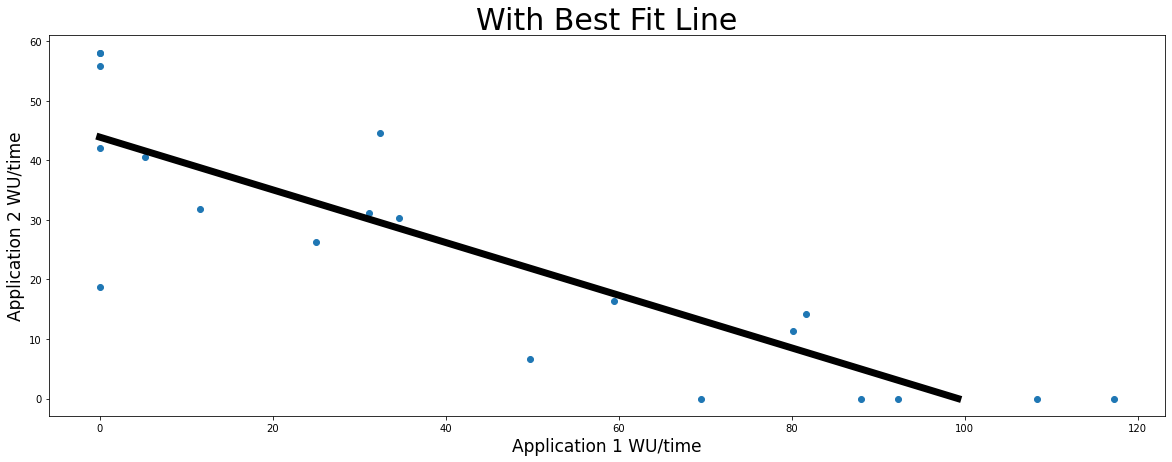

In [6]:
model = lin_reg(X, y)
slope = model.coef_
intercept = model.intercept_
network_ER = get_equivalence_ratio(slope, intercept)
slope, intercept

ER_xs_to_plot, ER_ys_to_plot = get_axes_points_for_plotting(slope, intercept)

plt.scatter(X, y.reshape(-1, 1))
plot_network_ER(slope, intercept)

plt.xlabel('Application 1 WU/time', size=17)
plt.ylabel('Application 2 WU/time', size=17)
plt.title('With Best Fit Line', size=30)
plt.savefig('./images/Sample Data Points With Best Fit Line.png', bbox_inches='tight')


fig = plt.gcf()
fig.set_size_inches(20, 7)


Finally, estimate the ER of every machine by passing the best-fit line through each of the points.

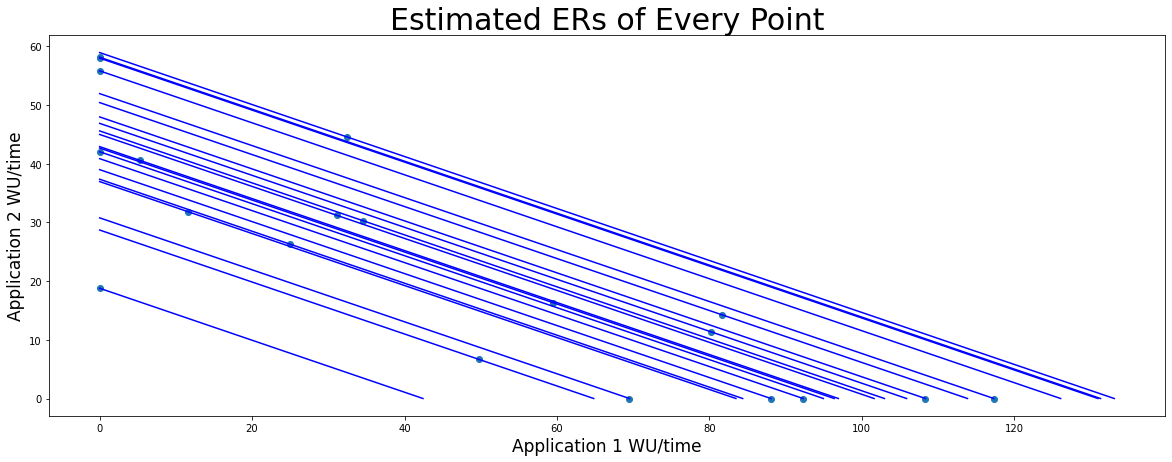

In [7]:
individual_ER_slopes, individual_ER_intercepts = get_intercepts_from_slopes_and_points(slope, X, y)
individual_ERs = get_all_individual_equivalence_ratios(individual_ER_slopes, individual_ER_intercepts)

plt.scatter(X, y.reshape(-1, 1))
plot_individual_ER_same_color(individual_ER_slopes, individual_ER_intercepts)
# plot_network_ER(slope, intercept)
plt.xlabel('Application 1 WU/time', size=17)
plt.ylabel('Application 2 WU/time', size=17)
plt.title('Estimated ERs of Every Point', size=30)
plt.savefig('./images/Sample Data Points With Same ERs.png', bbox_inches='tight')


fig = plt.gcf()
fig.set_size_inches(20, 7)


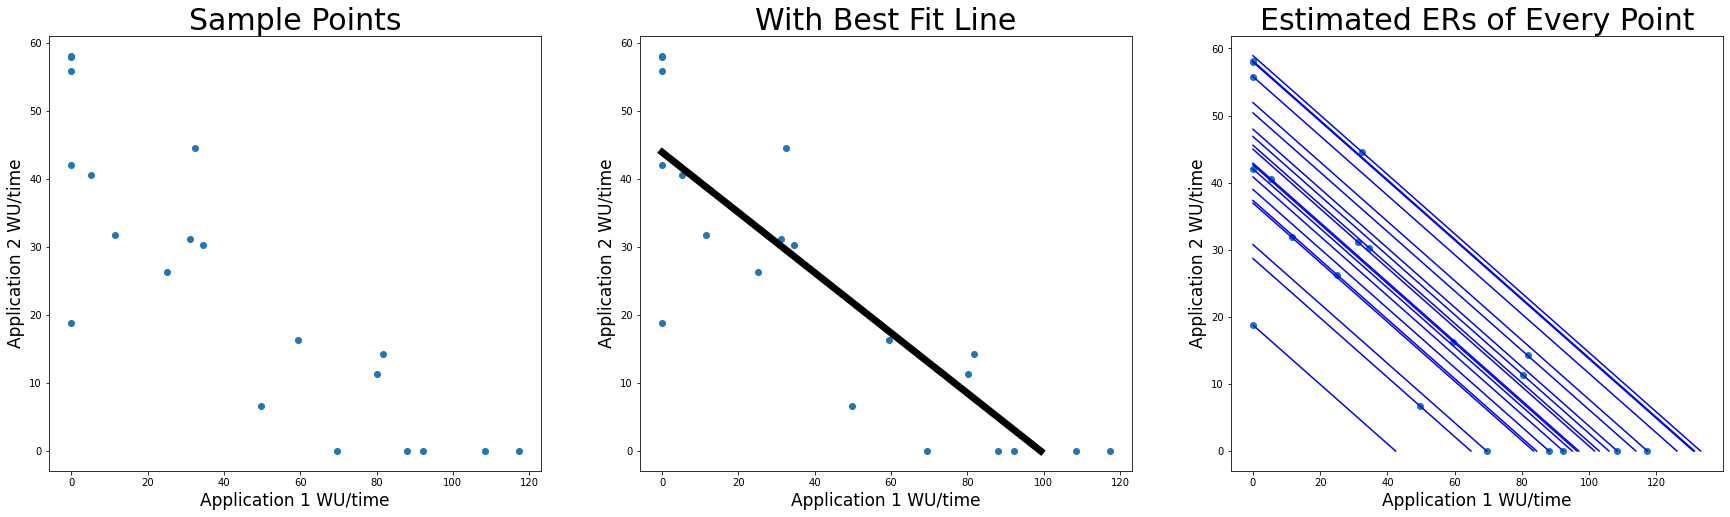

In [8]:
# # X = np.arange(0, 105, 5)
# # y = np.arange(50, -2.5, -2.5)

num_machines = len(X)
num_projects = 2




plt.subplot(1,3,1)
plt.scatter(X, y);
plt.xlabel('Application 1 WU/time', size=17)
plt.ylabel('Application 2 WU/time', size=17)
plt.title('Sample Points', size=30)
plt.savefig('./images/Sample Data Points.png', bbox_inches='tight')




plt.subplot(1,3,2)
model = lin_reg(X, y)
slope = model.coef_
intercept = model.intercept_
network_ER = get_equivalence_ratio(slope, intercept)

ER_xs_to_plot, ER_ys_to_plot = get_axes_points_for_plotting(slope, intercept)

plt.scatter(X, y.reshape(-1, 1))
plot_network_ER(slope, intercept)

plt.xlabel('Application 1 WU/time', size=17)
plt.ylabel('Application 2 WU/time', size=17)
plt.title('With Best Fit Line', size=30)
plt.savefig('./images/Sample Data Points With Best Fit Line.png', bbox_inches='tight')




plt.subplot(1,3,3)
individual_ER_slopes, individual_ER_intercepts = get_intercepts_from_slopes_and_points(slope, X, y)
individual_ERs = get_all_individual_equivalence_ratios(individual_ER_slopes, individual_ER_intercepts)

plt.scatter(X, y.reshape(-1, 1))
plot_individual_ER_same_color(individual_ER_slopes, individual_ER_intercepts)
# plot_network_ER(slope, intercept)
plt.xlabel('Application 1 WU/time', size=17)
plt.ylabel('Application 2 WU/time', size=17)
plt.title('Estimated ERs of Every Point', size=30)
plt.savefig('./images/Sample Data Points With Same ERs.png', bbox_inches='tight')




# plt.subplot(2,2,4)
# individual_ER_slopes, individual_ER_intercepts = get_intercepts_from_slopes_and_points(slope, X, y)
# individual_ERs = get_all_individual_equivalence_ratios(individual_ER_slopes, individual_ER_intercepts)
# plt.scatter(X, y.reshape(-1, 1))
# plot_individual_ER_same_color(individual_ER_slopes, individual_ER_intercepts)
# plot_network_ER(slope, intercept)
# plt.xlabel('Project 1', size=20)
# plt.ylabel('Project 2', size=20)
# plt.title('Estimated ERs of Every Point', size=30)
# # plt.savefig('./images/Synthetic Data Points With Estimated ERs of Every Point.png', bbox_inches='tight')


fig = plt.gcf()
fig.set_size_inches(30, 8)
# fig.suptitle('Synthetic Data Points', size=40);
plt.savefig('./images/All Sample Data Points.png', bbox_inches='tight')


With the starting points and initial individual ERs completed, we must now change the slopes of the lines in order to add some randomness, and be able to model strategic behavior. Since we know that in practice, the "true" ER for any machine will need to pass through its corresponding real-life datapoint, we need new intercepts.

Before, we had $y_i = m_i x_i + b_i$, where $m_i = m \ \forall i$.

Now, we have $y_i = m_i' x_i + b_i'$, where $m_i'$ is given. So, we must solve for the $b_i'$:

$$b_i' = y_i - m_i' x_i$$

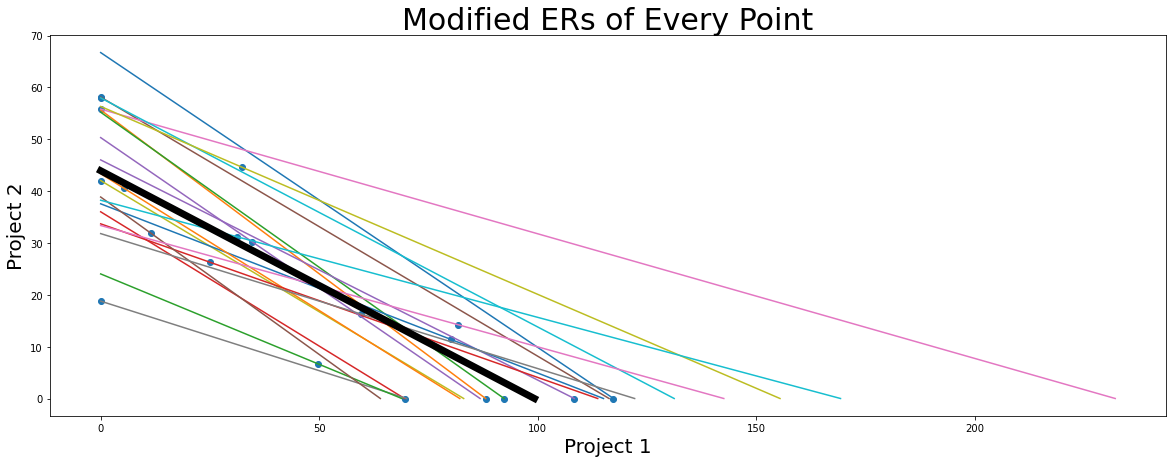

In [9]:
individual_ER_slopes, individual_ER_intercepts = get_new_slopes_and_intercepts(slope, X, y)
# print(individual_ER_slopes, individual_ER_intercepts)
individual_ERs = get_all_individual_equivalence_ratios(individual_ER_slopes, individual_ER_intercepts)
plt.scatter(X, y.reshape(-1, 1))
plot_individual_ER(individual_ER_slopes, individual_ER_intercepts)
plot_network_ER(slope, intercept)
plt.xlabel('Project 1', size=20)
plt.ylabel('Project 2', size=20)
plt.title('Modified ERs of Every Point', size=30)
plt.savefig('./images/Sample Data Points With Modified ERs.png', bbox_inches='tight')

In [10]:
X, y, individual_ER_slopes, individual_ER_intercepts

(array([117.30751822,  88.05833918,  92.28597876,  69.50723001,
        108.34285134,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  80.1549488 ,   5.27433452,
         49.7240914 ,  24.99896271,  34.56752789,  11.57410765,
         81.66114314,  59.5263631 ,  32.43855743,  31.08554145]),
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        58.12499424, 55.80681956, 18.77537275, 42.02922254, 57.97242524,
        11.38120929, 40.56520494,  6.67966131, 26.27664852, 30.27329772,
        31.82476679, 14.2504585 , 16.30236653, 44.56069636, 31.21227407]),
 array([-0.56866305, -0.63182752, -0.59817521, -0.51798289, -0.42467044,
        -0.49980851, -0.24046167, -0.2682684 , -0.50613801, -0.44189407,
        -0.32643208, -0.52772576, -0.34878064, -0.29625748, -0.57969362,
        -0.60735756, -0.23406462, -0.26034178, -0.36239187, -0.22592168]),
 array([66.70845134, 55.63768224, 55.20318506, 36.00355584, 46.01000618,
        58.124994

The following cell will select *new* points and ERs that converge in the game.

In [11]:
# # slopes and intercepts that will converge

# X = np.array([109.83595325,  86.60391844,  95.65314261, 109.50966095,
#          84.22988656,   0.        ,   0.        ,   0.        ,
#           0.        ,   0.        ,  13.9492999 , 100.37778905,
#          49.94803729,   7.21421774,   6.51066593,  84.03282881,
#          66.56901036,  45.7457311 ,  58.57032237,  21.72410488])

# y = np.array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
#         77.04449175, 40.19084206, 46.19325526, 62.60572687, 59.23035669,
#         14.14818414,  5.45563467, 19.74556565, 53.02649508, 10.13483384,
#          1.41114425,  7.6176386 , 32.73832829,  2.64990768, 15.86592269])

# individual_ER_slopes = np.array([-0.34882249, -0.28403109, -0.53796138, -0.4568383 , -0.53521162,
#         -0.47497254, -0.43573908, -0.53335631, -0.33266767, -0.57914963,
#         -0.25117847, -0.57238888, -0.30779787, -0.57764414, -0.47973513,
#         -0.51828088, -0.46650707, -0.40002248, -0.30846219, -0.59401481]) 

# individual_ER_intercepts = np.array([42.14716449, 35.85808235, 65.21308009, 48.35730175, 54.26611732,
#         71.46434789, 43.07208742, 49.18882231, 42.2329526 , 56.3172195 ,
#         57.16133305, 58.02308431, 37.54988222, 48.06422712, 82.20974532,
#         52.33406763, 50.43438272, 24.2300032 , 42.94559098, 58.64695559])

# individual_ERs = get_all_individual_equivalence_ratios(individual_ER_slopes, individual_ER_intercepts)


The following cell will select *new* points and ERs that diverge in the game.

In [12]:
# # slopes and intercepts that will diverge

# X = np.array([ 79.91251798, 104.07638544,  48.60036731,  96.56059533,
#          88.52590254,   0.        ,   0.        ,   0.        ,
#           0.        ,   0.        ,  32.09951262,  14.63552241,
#          33.73635054,  87.97989724, 138.10504773,  12.34327849,
#          85.51018804, 109.51355875,  91.2242375 ,  86.52996131])

# y = np.array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
#         66.61815641, 78.18210899, 82.55618448, 48.35832759, 44.81402778,
#         29.40731749, 14.5426081 , -1.44963529,  0.63206657,  1.88405292,
#         43.35939508, 12.38626771,  1.44178548,  2.89396779, 26.67450328])

# individual_ER_slopes = np.array([-0.65379819, -0.37759515, -0.5838712 , -0.52839651, -0.45399567,
#         -0.70144601, -0.29724253, -0.28166523, -0.33527976, -0.27669982,
#         -0.38709458, -0.29270979, -0.61317774, -0.41759072, -0.29813435,
#         -0.64137848, -0.68535393, -0.30216388, -0.32728475, -0.35596903])

# individual_ER_intercepts = np.array([52.24665991, 39.29873854, 28.37635492, 51.0222819 , 40.19037636,
#         66.61815641, 78.18210899, 82.55618448, 48.35832759, 44.81402778,
#         41.83286487, 18.82656872, 19.23674399, 37.37165558, 43.0579109 ,
#         51.27610826, 70.9910115 , 34.53282733, 32.75026917, 57.47648989])

# individual_ERs = get_all_individual_equivalence_ratios(individual_ER_slopes, individual_ER_intercepts)


The following cell will select *new* points and ERs that cycle in the game.

In [13]:
# slopes and intercepts that will diverge

X = np.array([120.8269688 , 126.2470315 , 121.22260479, 105.85211798,
        101.39188945,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  78.54202705,  86.43290522,
         62.07754332,  62.85644575,  22.28967429,  91.74884065,
         43.25471235,  16.07294966,  12.23740837,  73.18929309])

y = np.array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        71.46434789, 43.07208742, 49.18882231, 42.2329526 , 56.3172195 ,
        37.43326695,  8.54985072, 18.44254631, 11.75556967, 71.51660546,
         4.78239806, 30.25575347, 17.80046198, 39.17081324, 15.17143139])

individual_ER_slopes = np.array([-0.28628279, -0.37745363, -0.56105299, -0.48739627, -0.22695893,
        -0.51857665, -0.50342069, -0.65073514, -0.65094734, -0.40338531,
        -0.46256309, -0.63758264, -0.29999611, -0.23767173, -0.51287053,
        -0.2729297 , -0.49041093, -0.48781259, -0.34072552, -0.37615628])

individual_ER_intercepts = np.array([34.59068195, 47.65240032, 68.01230453, 51.59192719, 23.01179438,
        71.46434789, 43.07208742, 49.18882231, 42.2329526 , 56.3172195 ,
        73.76390939, 63.65797095, 37.06556794, 26.6947701 , 82.94832261,
        29.82338135, 51.46833714, 25.64104915, 43.34041056, 42.70204339])

individual_ERs = get_all_individual_equivalence_ratios(individual_ER_slopes, individual_ER_intercepts)


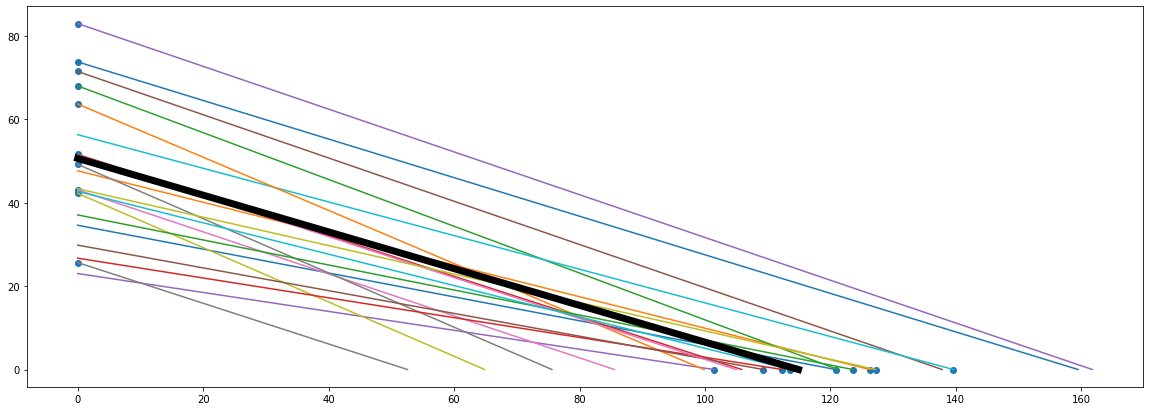

In [14]:
# compute new network ER
model = lin_reg(X, y)
slope = model.coef_
intercept = model.intercept_
network_ER = get_equivalence_ratio(slope, intercept)

new_X_positions, new_y_positions = update_points(individual_ER_slopes, individual_ER_intercepts, individual_ERs, network_ER)
new_lin_reg = lin_reg(new_X_positions, new_y_positions)

# plot the ERs
plot_individual_ER(individual_ER_slopes, individual_ER_intercepts)
plt.scatter(new_X_positions, new_y_positions)
plot_network_ER(slope, intercept)


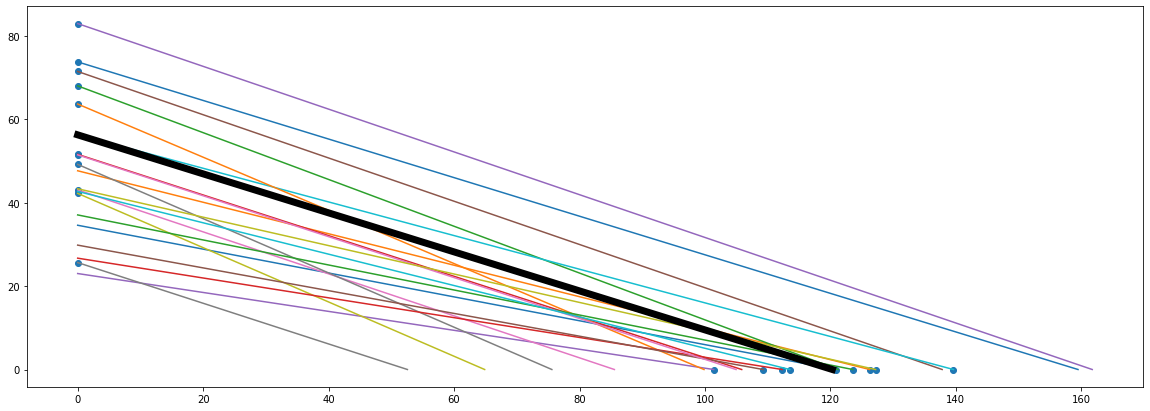

In [15]:
# plot after updating ER, before updating the applications that machines are running
plt.scatter(new_X_positions, new_y_positions)
plot_individual_ER(individual_ER_slopes, individual_ER_intercepts)
new_ER_slopes, new_ER_intercepts = new_lin_reg.coef_, new_lin_reg.intercept_
new_network_ER = get_equivalence_ratio(new_ER_slopes, new_ER_intercepts)
plot_network_ER(new_ER_slopes, new_ER_intercepts)

Here is what the game looks like:

1) first, define points, and get the network ER from the original distribution of points

2) get the static individual ERs by modifying the network ER

3) recall that the network ER is what can change during every iteration of the game
 
4) maximize profit per machine

5) get new ER

6) maximize profit per machine

7) if the applications that machines are crunching are different than the last iteration, go back to step 5

8) else, break

In [16]:
def run_game(individual_ER_slopes, individual_ER_intercepts, individual_ERs, network_ER, new_X_positions, new_y_positions):
    iteration = 0
    indices_most_profitable_applications = get_indices_most_profitable_projects(individual_ERs, network_ER)
    ERs = []
    ERs.append(network_ER)
    all_indices_most_profitable_applications = []
    all_indices_most_profitable_applications.append(indices_most_profitable_applications)
    while True:
        print('iteration = ', iteration)
        iteration += 1
        
#         plot_individual_ER(individual_ER_slopes, individual_ER_intercepts)
#         plt.scatter(new_X_positions, new_y_positions)
#         plot_network_ER(slope, intercept)

        # maximize profit per machine
        new_X_positions, new_y_positions = update_points(individual_ER_slopes, individual_ER_intercepts, individual_ERs, network_ER)

        # get new network ER
        new_lin_reg = lin_reg(new_X_positions, new_y_positions)
        new_ER_slopes, new_ER_intercepts = new_lin_reg.coef_, new_lin_reg.intercept_
        new_network_ER = get_equivalence_ratio(new_ER_slopes, new_ER_intercepts)

        # update network ER 
        network_ER = new_network_ER
        ERs.append(network_ER)
        
        # get new most profitable applications
        new_indices_most_profitable_applications = get_indices_most_profitable_projects(individual_ERs, network_ER)
        all_indices_most_profitable_applications.append(new_indices_most_profitable_applications)

        
        # print some useful stuff
        print(indices_most_profitable_applications == new_indices_most_profitable_applications)
        print(indices_most_profitable_applications)
        print(new_indices_most_profitable_applications)

        
        # if the assignment of most profitable applications is not the same as before        
        if np.all(indices_most_profitable_applications == new_indices_most_profitable_applications):
            print("Game converged")
            break
    
        # most profitable applications and network ERs can cycle with period of 3; 
        # we already added the most recent set,
        # so both most profitable applications and networks ER 4 elements ago
        if iteration > 4 and \
            np.all(new_indices_most_profitable_applications == all_indices_most_profitable_applications[-4]) \
            and np.all(network_ER == ERs[-4]):
            print('Game is cycling')
            break
            
        # most profitable applications and network ERs can cycle with period of 2; 
        # we already added the most recent set,
        # so both most profitable applications and networks ER 3 elements ago
        if iteration > 3 and \
            np.all(new_indices_most_profitable_applications == all_indices_most_profitable_applications[-3]) \
            and np.all(network_ER == ERs[-3]):
            print('Game is cycling')
            break

            
        if iteration == 100:
            print("Iteration = {}, Game Has Not Converged".format(iteration))
            break
    
        indices_most_profitable_applications = new_indices_most_profitable_applications

    return all_indices_most_profitable_applications, ERs

In [17]:
all_indices_most_profitable_applications, ERs = run_game(individual_ER_slopes, individual_ER_intercepts, individual_ERs, network_ER, new_X_positions, new_y_positions)

iteration =  0
[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True]
[1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1]
[1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1]
iteration =  1
[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True]
[1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1]
[1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1]
iteration =  2
[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True]
[1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1]
[1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1]
iteration =  3
[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True]
[1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1]
[1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1]
Game is cycling


In [18]:
all_indices_most_profitable_applications

[array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1]),
 array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1]),
 array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1]),
 array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1]),
 array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1])]

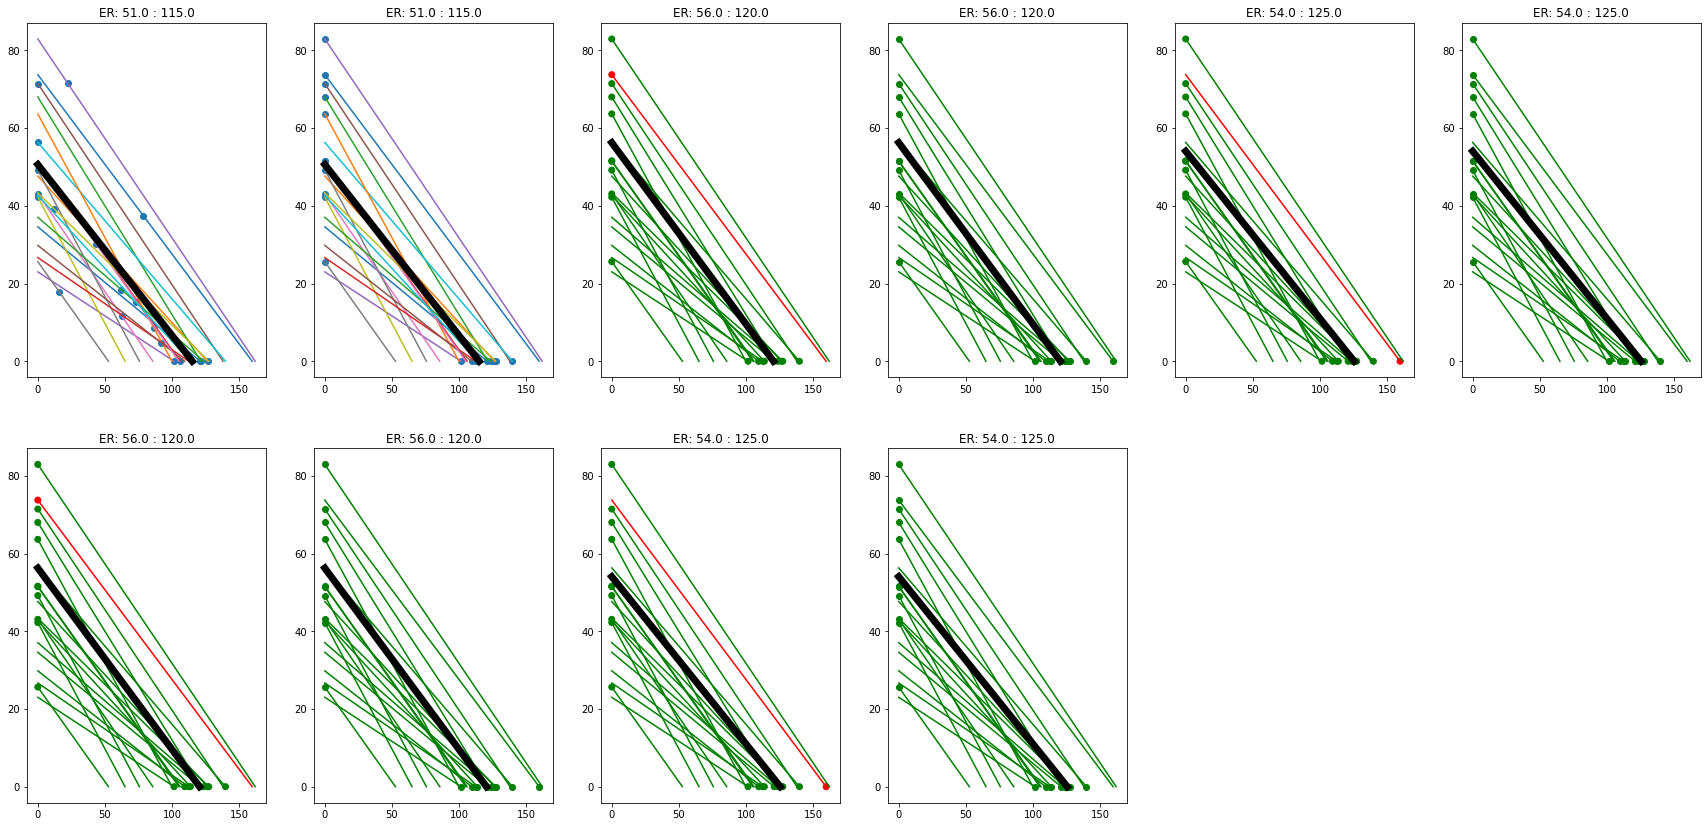

In [19]:
plt.subplot(int(2 * len(all_indices_most_profitable_applications) / 3) + 1, 2 * 3, 1)
plot_individual_ER(individual_ER_slopes, individual_ER_intercepts)
plt.scatter(X, y)
plot_network_ER(slope, intercept)
plt.title('ER: {} : {}'.format(np.round(network_ER[0][0]), np.round(network_ER[1][0])))

plt.subplot(int(2 * len(all_indices_most_profitable_applications) / 3) + 1, 2 * 3, 2)
plot_individual_ER(individual_ER_slopes, individual_ER_intercepts)
plt.scatter(new_X_positions, new_y_positions)
plot_network_ER(slope, intercept)
plt.title('ER: {} : {}'.format(np.round(network_ER[0][0]), np.round(network_ER[1][0])))

did_application_change = None

for num_update in range(2, 2 * len(all_indices_most_profitable_applications))[::2]:
    
    did_application_change = (all_indices_most_profitable_applications[int(num_update / 2)]
                         != all_indices_most_profitable_applications[int(num_update / 2) - 1])
    
    
    plt.subplot(int(2 * len(all_indices_most_profitable_applications) / 3) + 1, 2 * 3, num_update + 1)
    
    plot_individual_ER_colored(individual_ER_slopes, individual_ER_intercepts, did_application_change)
    current_network_ER = ERs[int(num_update / 2)]
#     print(current_network_ER)
    plot_network_ER_from_ER(current_network_ER)

    
    
    cmap = np.where(did_application_change, 'red', 'green')
    plt.scatter(new_X_positions, new_y_positions, c=cmap)
    plt.title('ER: {} : {}'.format(np.round(current_network_ER[0][0]), np.round(current_network_ER[1][0])))


    new_X_positions, new_y_positions = update_points(individual_ER_slopes, individual_ER_intercepts, individual_ERs, current_network_ER)

    
    
    plt.subplot(int(2 * len(all_indices_most_profitable_applications) / 3) + 1, 2 * 3, num_update + 2)
    
    plot_individual_ER_colored(individual_ER_slopes, individual_ER_intercepts, [False] * len(did_application_change))
    plt.scatter(new_X_positions, new_y_positions, c='green')
    plot_network_ER_from_ER(current_network_ER)
    plt.title('ER: {} : {}'.format(np.round(current_network_ER[0][0]), np.round(current_network_ER[1][0])))

    

fig = plt.gcf()
fig.set_size_inches(30, 30)

# plt.savefig('./images/Game Simulation Converge.png', bbox_inches='tight')
# plt.savefig('./images/Game Simulation Diverge.png', bbox_inches='tight')
plt.savefig('./images/Game Simulation Cycle.png', bbox_inches='tight')

In [20]:
ERs

[[array([50.62234415]), array([114.90534761])],
 [array([56.26708676]), array([120.30190503])],
 [array([54.05483048]), array([125.36566668])],
 [array([56.26708676]), array([120.30190503])],
 [array([54.05483048]), array([125.36566668])]]